## READING DATA

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
 
 

from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 12), dpi=200,  facecolor='w', edgecolor='k')

#from data_clean_visual.ipynb
csv_file = "powertest_CRAC3_2.out.csv"
 

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

count =0


rcParams['figure.figsize'] = 15, 6
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
# dateparse('2018-05-16 14:41:00')
data = pd.read_csv(csv_file, parse_dates=[0], index_col=0,date_parser=dateparse)
#print data.index
#print data.head()
#print data.dtypes
ts = data['Consumed_active_energy_kW']
print ts.head()




Timestamp
2018-05-16 14:41:00    5180.7440
2018-05-16 14:42:00    5180.7470
2018-05-16 14:43:00    5180.7500
2018-05-16 14:44:00    5180.7525
2018-05-16 14:45:00    5180.7555
Name: Consumed_active_energy_kW, dtype: float64


## Define Stationary test

In [36]:
def test_stationarity(timeseries,originalname='Original'):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=1440)
    rolstd = pd.rolling_std(timeseries, window=1440)
    #Plot rolling statistics:
    plt.grid("on")
    plt.xlabel("data point")
    plt.ylabel("Consumed active energy")
    plt.title("Rolling Mean/std")
    orig = plt.plot(timeseries, color='blue',label=originalname)
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    plt.show() 
    global count
    count = count+1
    plt.savefig('stationary'+str(count)+'.png')
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print dfoutput

## Test stationary

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).std()
  """


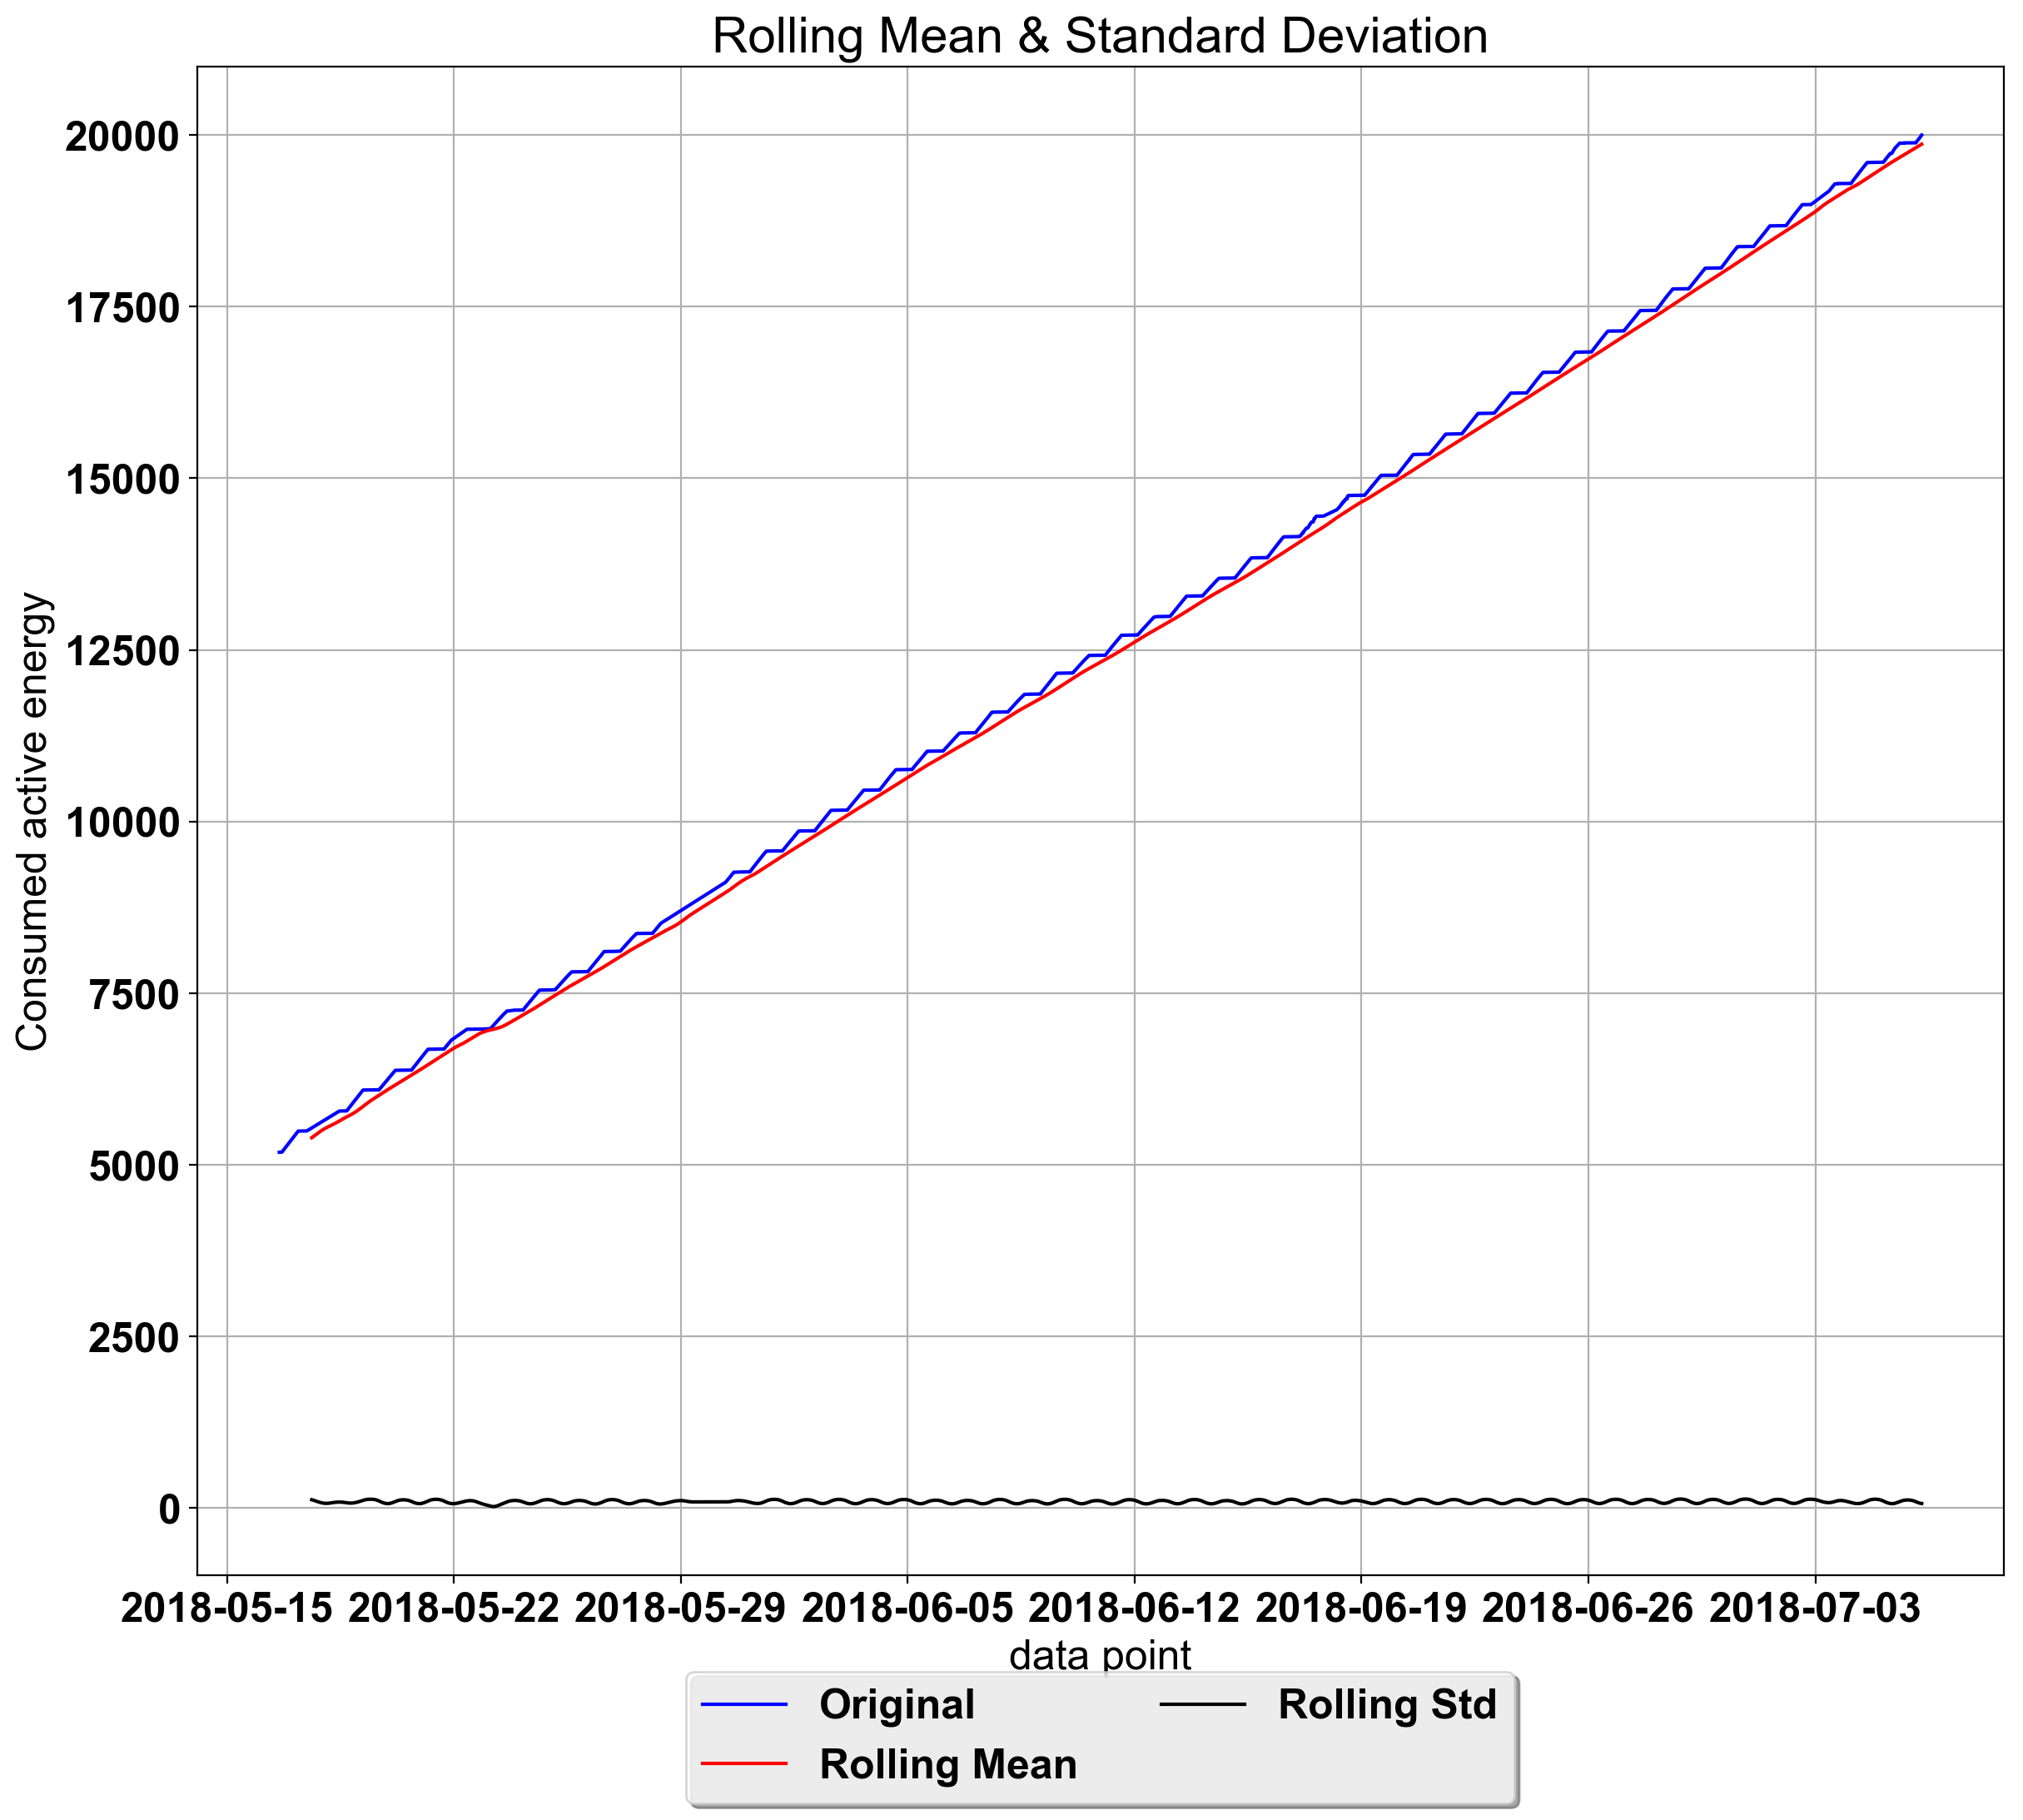

Results of Dickey-Fuller Test:
Test Statistic                     0.072995
p-value                            0.964168
#Lags Used                        62.000000
Number of Observations Used    72901.000000
Critical Value (5%)               -2.861580
Critical Value (1%)               -3.430440
Critical Value (10%)              -2.566791
dtype: float64


In [37]:
test_stationarity(ts)


## Plot log diff
Eliminate non-stationary /trend

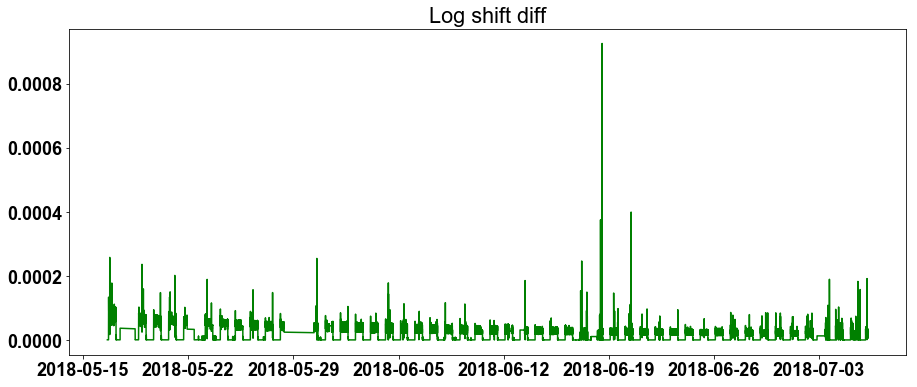

In [38]:

ts_log = np.log(ts)
#eliminate non-stationary
#difference
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff,color='green',ls='-',label='log_shift_diff')

plt.title('Log shift diff')
plt.savefig( '-Logshiftdiff.png')
plt.show()



## Test stationary again

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).std()
  """


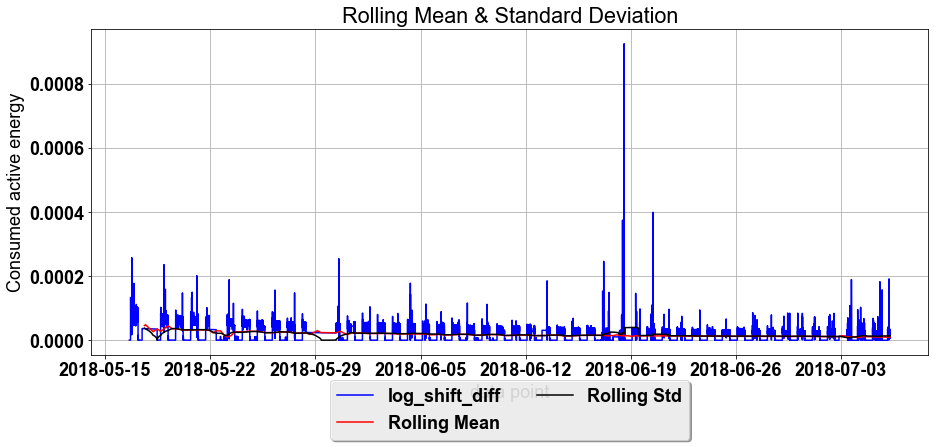

Results of Dickey-Fuller Test:
Test Statistic                -1.041819e+01
p-value                        1.732179e-18
#Lags Used                     6.300000e+01
Number of Observations Used    7.289900e+04
Critical Value (5%)           -2.861580e+00
Critical Value (1%)           -3.430440e+00
Critical Value (10%)          -2.566791e+00
dtype: float64


In [39]:

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff,'log_shift_diff')




## Decompose trend + seasonal
additive model 

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompfreq = 3600
#decomposition = seasonal_decompose(ts_log,freq=decompfreq, model='multiplicative')
decomposition = seasonal_decompose(ts_log,freq=decompfreq)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

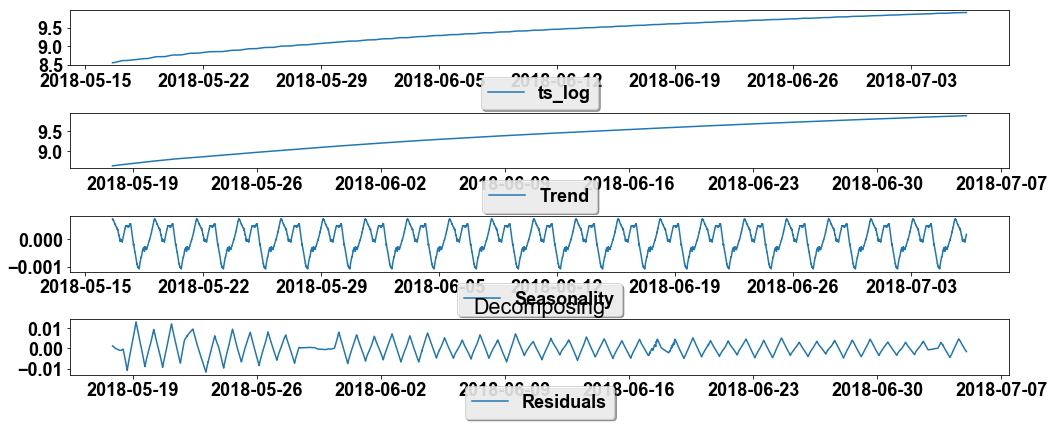

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).std()
  """


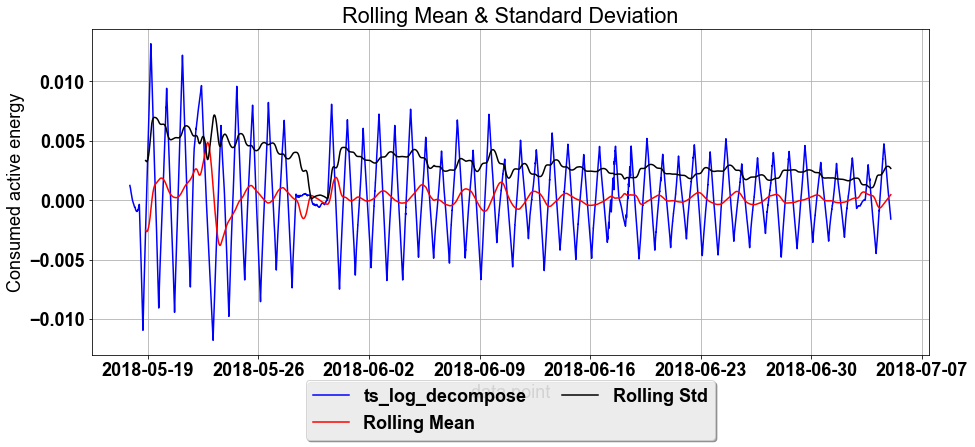

Results of Dickey-Fuller Test:
Test Statistic                -1.456013e+01
p-value                        4.809563e-27
#Lags Used                     6.200000e+01
Number of Observations Used    6.930100e+04
Critical Value (5%)           -2.861582e+00
Critical Value (1%)           -3.430444e+00
Critical Value (10%)          -2.566792e+00
dtype: float64


In [50]:
plt.subplot(411)
plt.plot(ts_log, label='ts_log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)

plt.title('Decomposing')
plt.show()
plt.savefig('decompose.png')

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose,'ts_log_decompose')
 
residual.to_csv("CRAC3_residual.csv",header=True)